In [1]:
import os,sys
#Change and check directory
os.chdir('C:\WGU\D212')
os.getcwd()

'C:\\WGU\\D212'

In [2]:
#import necessary libraries
import pandas as pd
#For array functionality
import numpy as np
#For visualizations
import seaborn as sns
from matplotlib import pyplot as plt
#For preprocessing the data
from sklearn.preprocessing import StandardScaler
#import sklearn for KMenas model
from sklearn.cluster import KMeans
#for analyzing the model
from sklearn.metrics import silhouette_score

#load the data frame
df = pd.read_csv('churn_clean.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [3]:
#Data Cleaning
#Detect and treat NULLS - we can see from the describe call that there is only one column with missing values
#InternetService: This column actually doesn't have any null values it just got read in as NULL rather than None indicating the customer doesn't have this service
df['InternetService'].fillna('None',inplace=True)

In [4]:
#drop columns that will not be used
df = df.drop(columns=['Bandwidth_GB_Year','PaymentMethod','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','Multiple','Phone','InternetService','Tablet','Population','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Contract','Port_modem','Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Area', 'Job', 'Techie', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Children       10000 non-null  int64  
 1   Age            10000 non-null  int64  
 2   Income         10000 non-null  float64
 3   Marital        10000 non-null  object 
 4   Gender         10000 non-null  object 
 5   Churn          10000 non-null  object 
 6   Tenure         10000 non-null  float64
 7   MonthlyCharge  10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 703.1+ KB


In [6]:
#Summary Statistics and Reviewing for Outliers
df.describe()

,Children,Age,Income,Tenure,MonthlyCharge
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,34.526188,172.624816
std,2.1472,20.698882,28199.916702,26.443063,42.943094
min,0.0000,18.000000,348.670000,1.000259,79.978860
25%,0.0000,35.000000,19224.717500,7.917694,139.979239
50%,1.0000,53.000000,33170.605000,35.430507,167.484700
75%,3.0000,71.000000,53246.170000,61.479795,200.734725
max,10.0000,89.000000,258900.700000,71.999280,290.160419


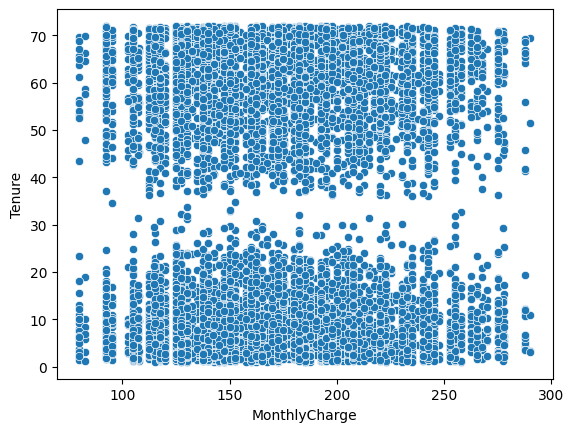

In [7]:
#Get an initial view of the data being used to answer the research question
ax = sns.scatterplot(data = df, x = 'MonthlyCharge', y = 'Tenure')

In [8]:
#Data Preprocessing
clusterdata = df[['MonthlyCharge','Tenure']].describe().round(2)
clusterdata

,MonthlyCharge,Tenure
count,10000.00,10000.00
mean,172.62,34.53
std,42.94,26.44
min,79.98,1.00
25%,139.98,7.92
50%,167.48,35.43
75%,200.73,61.48
max,290.16,72.00


In [9]:
#Normalize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['MonthlyCharge','Tenure']])
scaled_df = pd.DataFrame(scaled_df, columns = ['MonthlyCharge','Tenure'])
scaled_df.to_csv('scaled_df_Task1.csv')
scaled_df

,MonthlyCharge,Tenure
0,-0.003943,-1.048746
1,1.630326,-1.262001
2,-0.295225,-0.709940
3,-1.226521,-0.659524
4,-0.528086,-1.242551
...,...,...
9995,-0.294484,1.273401
9996,0.811726,1.002740
9997,-0.061729,0.487513
9998,1.863005,1.383018


In [10]:
#Create the initial KMeans model to fit the scaled data to
k_model = KMeans(n_clusters = 3, n_init = 25, random_state = 300)
k_model.fit(scaled_df)

KMeans(n_clusters=3, n_init=25, random_state=300)

In [11]:
#Evaluate the initial model 
clusters = pd.Series(k_model.labels_).value_counts()
clusters

0    3852
1    3822
2    2326
Name: count, dtype: int64

In [12]:
#Visalize Cluster Centers
centroid = pd.DataFrame(k_model.cluster_centers_,columns = ['MonthlyCharge','Tenure'])
centroid

,MonthlyCharge,Tenure
0,-0.418915,-0.969637
1,-0.441352,0.978440
2,1.425306,0.001382


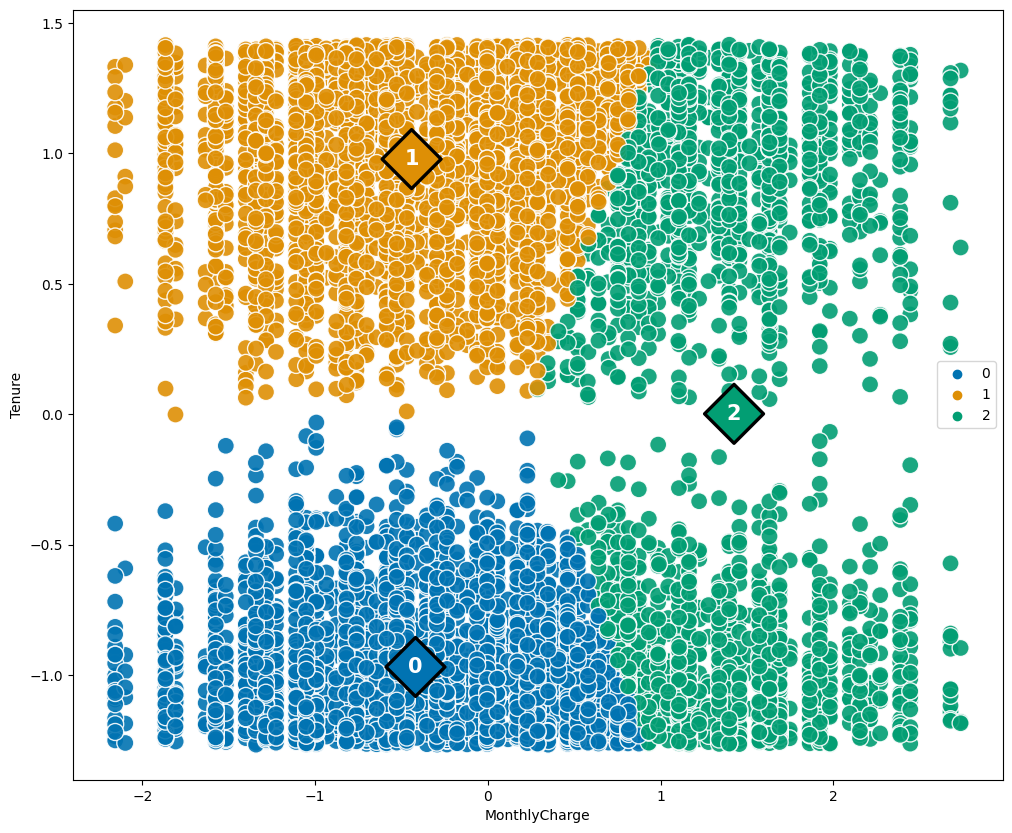

In [13]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(data = scaled_df, x = 'MonthlyCharge', y = 'Tenure', hue = k_model.labels_, palette = 'colorblind', alpha = .9, s = 150, legend = True)
ax = sns.scatterplot(data = centroid, x = 'MonthlyCharge', y = 'Tenure', hue = centroid.index, palette = 'colorblind', s = 900, marker = 'D', edgecolor = 'black', legend = False)
for i  in range(len(centroid)):
    plt.text(x = centroid.MonthlyCharge[i],
    y = centroid.Tenure[i],
    s = i,
    horizontalalignment = 'center',
    verticalalignment = 'center',
    size = 15,
    weight = 'bold', 
    color = 'white')

In [14]:
#Exaluate for the best number of clusters (wcss = Within-Cluster Sum of Square)
wcss = []
silhouette = []
for k in range (2, 11):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 300)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
    silhouette.append(silhouette_score(scaled_df, model.labels_))
wcss_s = pd.Series(wcss, index = range(2,11))
silhouette_s = pd.Series(silhouette, index = range(2,11))

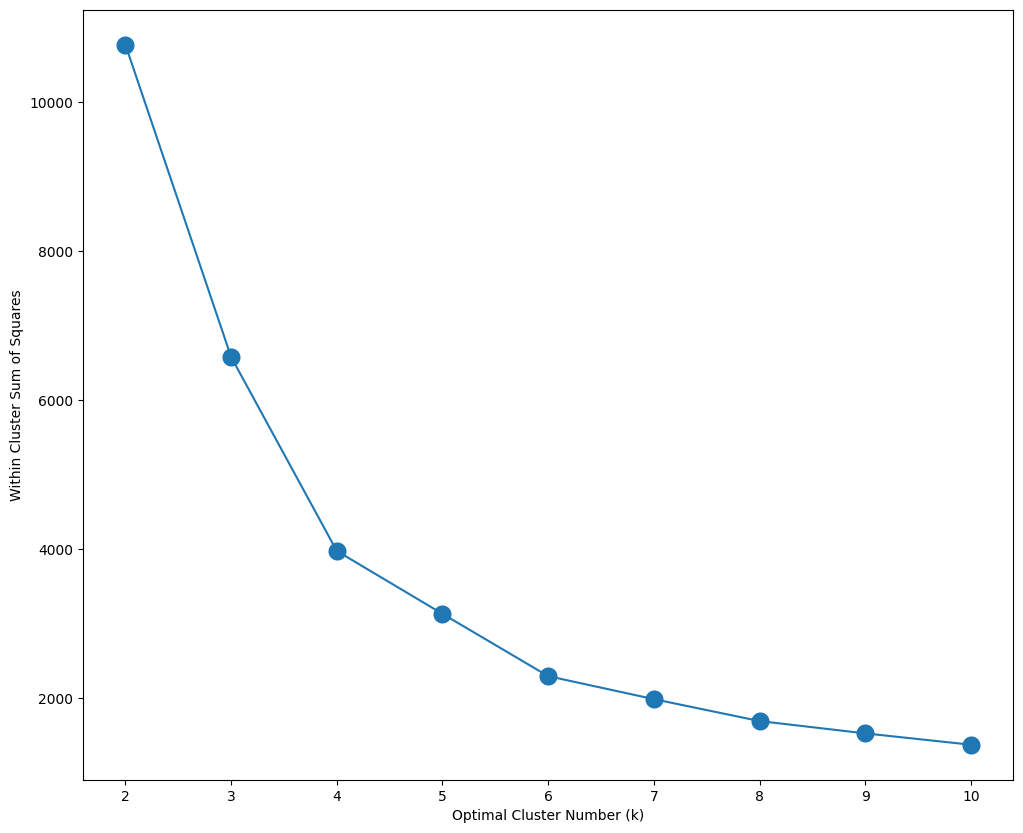

In [15]:
#plot elbow with wcss
plt.figure(figsize = (12,10))
ax = sns.lineplot(y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s, x = wcss_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Cluster Number (k)', ylabel = 'Within Cluster Sum of Squares')

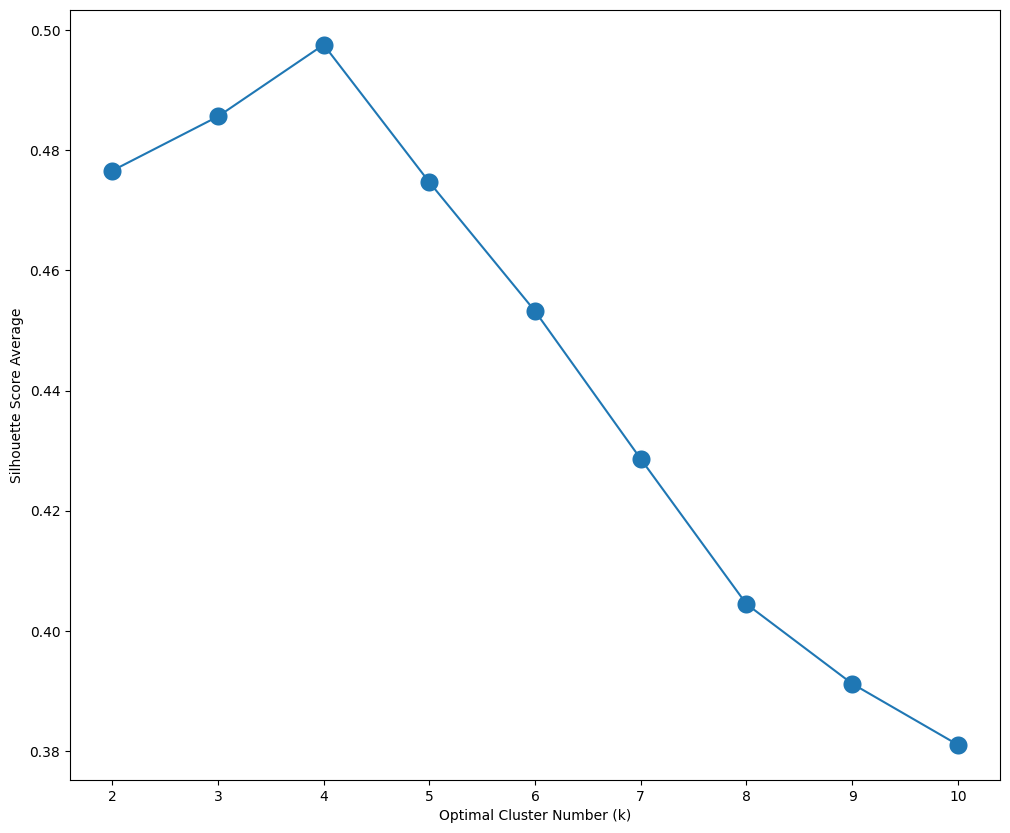

In [16]:
#plot silhouette 
plt.figure(figsize = (12,10))
ax = sns.lineplot(y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Cluster Number (k)', ylabel = 'Silhouette Score Average')

In [17]:
#Create Final Model
k_model = KMeans(n_clusters = 4, n_init = 25, random_state = 300)
k_model.fit(scaled_df)

KMeans(n_clusters=4, n_init=25, random_state=300)

In [18]:
centroid = pd.DataFrame(k_model.cluster_centers_,columns = ['MonthlyCharge','Tenure'])
centroid

,MonthlyCharge,Tenure
0,-0.687026,-0.962008
1,-0.685052,0.959667
2,1.001063,0.961338
3,0.980952,-0.958912


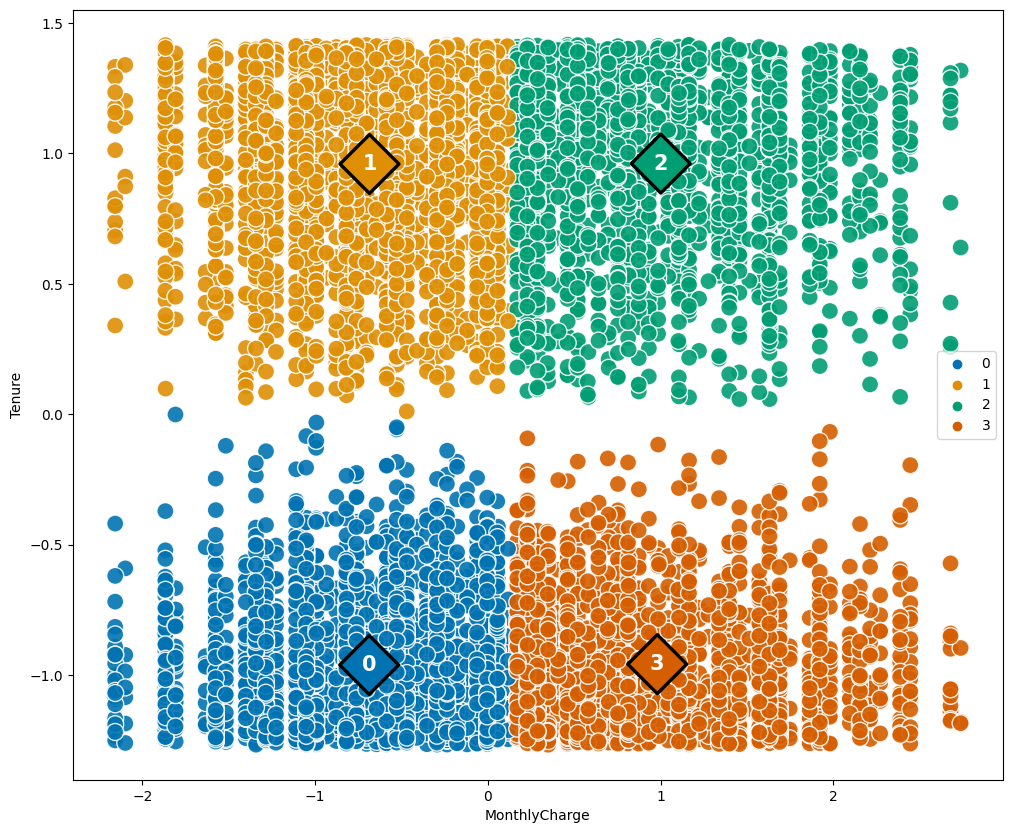

In [19]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(data = scaled_df, x = 'MonthlyCharge', y = 'Tenure', hue = k_model.labels_, palette = 'colorblind', alpha = .9, s = 150, legend = True)
ax = sns.scatterplot(data = centroid, x = 'MonthlyCharge', y = 'Tenure', hue = centroid.index, palette = 'colorblind', s = 900, marker = 'D', edgecolor = 'black', legend = False)
for i  in range(len(centroid)):
    plt.text(x = centroid.MonthlyCharge[i],
    y = centroid.Tenure[i],
    s = i,
    horizontalalignment = 'center',
    verticalalignment = 'center',
    size = 15,
    weight = 'bold', 
    color = 'white')

In [20]:
silhouette_score(scaled_df, model.labels_)

0.38106115614994773

In [21]:
#label unlabeled clusters
df['Cluster'] = k_model.labels_.tolist()
df.head()

,Children,Age,Income,Marital,Gender,Churn,Tenure,MonthlyCharge,Cluster
CaseOrder,,,,,,,,,
1,0,68,28561.99,Widowed,Male,No,6.795513,172.455519,0
2,1,27,21704.77,Married,Female,Yes,1.156681,242.632554,3
3,4,50,9609.57,Widowed,Female,No,15.754144,159.947583,0
4,1,48,18925.23,Married,Male,No,17.087227,119.956840,0
5,0,83,40074.19,Separated,Male,Yes,1.670972,149.948316,0


In [22]:
customers = pd.get_dummies(df, columns = ['Gender', 'Churn', 'Marital'])
customers.head(12)

,Children,Age,Income,Tenure,MonthlyCharge,Cluster,Gender_Female,Gender_Male,Gender_Nonbinary,Churn_No,Churn_Yes,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
CaseOrder,,,,,,,,,,,,,,,,
1,0,68,28561.99,6.795513,172.455519,0,False,True,False,True,False,False,False,False,False,True
2,1,27,21704.77,1.156681,242.632554,3,True,False,False,False,True,False,True,False,False,False
3,4,50,9609.57,15.754144,159.947583,0,True,False,False,True,False,False,False,False,False,True
4,1,48,18925.23,17.087227,119.956840,0,False,True,False,True,False,False,True,False,False,False
5,0,83,40074.19,1.670972,149.948316,0,False,True,False,False,True,False,False,False,True,False
6,3,83,22660.20,7.000994,185.007692,3,True,False,False,True,False,False,False,True,False,False
7,0,79,11467.50,13.236774,200.118516,3,False,True,False,False,True,False,False,False,False,True
8,2,30,26759.64,4.264255,114.950905,0,True,False,False,False,True,False,True,False,False,False
9,2,49,58634.51,8.220686,117.468591,0,False,False,True,True,False,False,False,False,True,False


In [23]:
customers.agg({
    'Gender_Female':'mean',
    'Gender_Male':'mean',
    'Gender_Nonbinary':'mean',
    'Age':'median',
    'MonthlyCharge':'median',
    'Tenure':'median',
    'Income':'median',
    'Children':'median',
    'Churn_No':'mean',
    'Churn_Yes':'mean',
    'Marital_Divorced':'mean',
    'Marital_Never Married':'mean',
    'Marital_Separated':'mean',
    'Marital_Widowed':'mean'
}).round(2)

Gender_Female                0.50
Gender_Male                  0.47
Gender_Nonbinary             0.02
Age                         53.00
MonthlyCharge              167.48
Tenure                      35.43
Income                   33170.60
Children                     1.00
Churn_No                     0.74
Churn_Yes                    0.26
Marital_Divorced             0.21
Marital_Never Married        0.20
Marital_Separated            0.20
Marital_Widowed              0.20
dtype: float64

In [24]:
customers.groupby('Cluster').agg({
    'Gender_Female':'mean',
    'Gender_Male':'mean',
    'Gender_Nonbinary':'mean',
    'Age':'median',
    'MonthlyCharge':'median',
    'Tenure':'median',
    'Income':'median',
    'Children':'median',
    'Churn_No':'mean',
    'Churn_Yes':'mean',
    'Marital_Divorced':'mean',
    'Marital_Never Married':'mean',
    'Marital_Separated':'mean',
    'Marital_Widowed':'mean'
}).round(2)

,Gender_Female,Gender_Male,Gender_Nonbinary,Age,MonthlyCharge,Tenure,Income,Children,Churn_No,Churn_Yes,Marital_Divorced,Marital_Never Married,Marital_Separated,Marital_Widowed
Cluster,,,,,,,,,,,,,,
0,0.50,0.47,0.03,52.0,147.46,7.90,33529.19,1.0,0.71,0.29,0.21,0.20,0.19,0.21
1,0.52,0.46,0.02,53.0,147.46,61.33,32839.44,2.0,0.99,0.01,0.21,0.19,0.20,0.21
2,0.50,0.48,0.02,54.0,210.14,61.62,33144.92,1.0,0.87,0.13,0.20,0.20,0.20,0.19
3,0.49,0.49,0.03,53.0,207.64,7.94,33306.54,2.0,0.27,0.73,0.21,0.19,0.21,0.20
